## Preprocessing tweets
this notebook highlights the code that is wrapped in Preprocessing.py 

get tweets

In [1]:
import mysql.connector

cnx = mysql.connector.connect(user="emlyon1",
                              password="student1",
                              host="analyst-toolbelt.cn119w37trlg.eu-west-1.rds.amazonaws.com",
                              database="B2B")

def execute(sql_query):
    """ execute sql query and return python list """
    cursor = cnx.cursor()
    cursor.execute(sql_query)
    return list(cursor)

get tweets

In [2]:
import numpy as np

company = "Alstom"

tweets = np.array(execute("SELECT * FROM tweet WHERE searchterm = '@" + company + "'"))
tweets = tweets[:,2]

len(tweets)

10567

get retweets

In [3]:
import re

pattern = re.compile("^RT ")
rt_tweets = [ tweet for tweet in tweets if pattern.match(tweet) ]

len(rt_tweets)

7001

only english tweets

In [4]:
from langdetect import detect

lang = "en"

lang_tweets = [ tweet for tweet in tweets if detect(tweet) == lang ]

len(lang_tweets)

6519

no urls

In [5]:
import re

url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
no_url_tweets = [ re.sub(url, '', tweet) for tweet in lang_tweets ]

no_url_tweets[1]

'First pics of new #OTrain. MT @pcplans: Daylight testing of new @Alstom Trillium Line vehicles in #ottawa #ottnews '

remove @ words

In [6]:
no_arobas_tweets = [ re.sub(r"([@?]\w+)\b", '', text) for text in no_url_tweets ]

no_arobas_tweets[1]

'First pics of new #OTrain. MT : Daylight testing of new  Trillium Line vehicles in #ottawa #ottnews '

remove non-alphanumerical characters

In [7]:
only_alphanum_tweets = [ re.sub(r'[^\w]', ' ', text) for text in no_arobas_tweets ]

only_alphanum_tweets[1]

'First pics of new  OTrain  MT   Daylight testing of new  Trillium Line vehicles in  ottawa  ottnews '

tokenizing

In [8]:
tokenized_tweets = [ tweet.split(" ") for tweet in only_alphanum_tweets ]

", ".join(tokenized_tweets[1])

'First, pics, of, new, , OTrain, , MT, , , Daylight, testing, of, new, , Trillium, Line, vehicles, in, , ottawa, , ottnews, '

lower tweets and remove one char words

In [9]:
lowered_tweets = [ [ word.lower() for word in text if len(word) > 1 ] for text in tokenized_tweets ]

", ".join(lowered_tweets[1])

'first, pics, of, new, otrain, mt, daylight, testing, of, new, trillium, line, vehicles, in, ottawa, ottnews'

remove stopwords

In [10]:
stopwords = open("./stopwords").read().split("\n")

stopwords += ["mon", "tue", "wed", "thu", "fri", "sat", "sun", 
              "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec",
              "amp", "rt", "https"]

filtered_tweets = [ [ word for word in text if word not in stopwords ] for text in lowered_tweets ]

", ".join(filtered_tweets[1])

'first, pics, new, otrain, mt, daylight, testing, new, trillium, line, vehicles, ottawa, ottnews'

isolate bigrams

In [11]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

def mark_bigrams(tweets):
    bigram = Phrases(tweets)
    bigram_phraser = Phraser(bigram)
    return list(bigram_phraser[tweets])

bigrams = mark_bigrams(filtered_tweets)

", ".join(bigrams[1])

'first, pics, new, otrain, mt, daylight, testing, new, trillium, line, vehicles, ottawa, ottnews'

reduce to one list of words

In [12]:
flat_text_bigrams = [ word for tweet in bigrams for word in tweet ]

flat_text = [ word for tweet in filtered_tweets for word in tweet ]

len(flat_text)

60302

get frequency dictionary

In [13]:
import collections

frequ = collections.Counter(flat_text_bigrams).most_common()

len(frequ)

4659

print 50 most frequent words

In [14]:
for i in range(50):
    print ("{:d},\t{:s}".format(frequ[i][1], frequ[i][0]))

1907,	alstom
1332,	train
857,	new
675,	first
507,	rail
469,	trains
373,	coradia_ilint
363,	world
339,	metro
222,	highspeed
212,	hydrogen
204,	tram
190,	transport
181,	line
176,	france
170,	aptis
155,	1st
152,	10_years
151,	rail_speedrecord
150,	energy_efficient
146,	smartermobility
143,	will
142,	hydrogen_fuel
138,	mobility
137,	run
127,	cell_passenger
124,	developed
124,	100_electric
119,	one
113,	km
108,	passenger
105,	didyouknow
104,	watch
95,	take_look
93,	experience_mobility
92,	thanks
92,	ht
90,	system
89,	pendolino
89,	run_80
87,	years
85,	world_premiere
84,	tram_depot
81,	makeinindia
79,	2016_17
77,	metro_lines
77,	1st_successful
77,	india
76,	germany
75,	eco_designed


save wordcloud

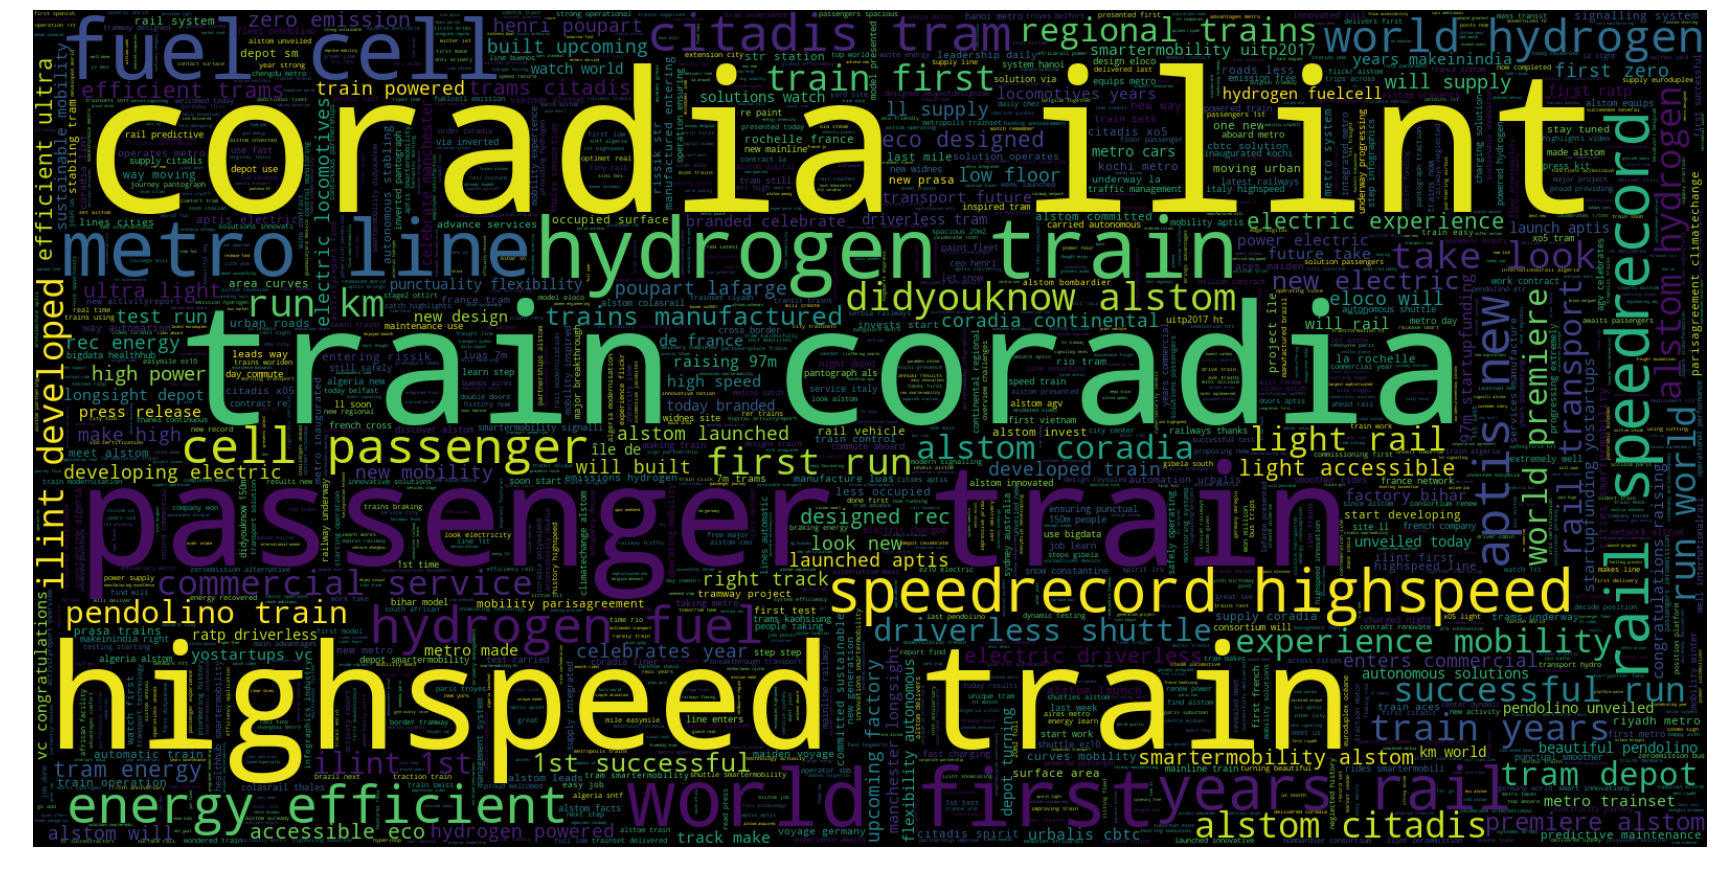

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, max_words=2000).generate(" ".join(flat_text))

plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
image = wordcloud.to_image()
image.save("wordclouds/wordcloud_" + company + ".png")

## return format
* name company
* number tweets
* nb retweet
* language chosen
* nb tweet in chosen language
* nb words
* nb unique words
* list of preprocessed tweets

In [23]:
data = (company, len(tweets), len(rt_tweets), lang, len(lang_tweets), len(flat_text_bigrams), len(frequ), filtered_tweets)